In [1]:
#written on 6.10.21 by @caramnix 
import gerrychain
import maup
import geopandas
import pandas as pd

In [ ]:
#!pip3 install jedi==0.17.2 #fixes tab completion 

In [2]:
BGs= geopandas.read_file("/Users/caranix/OneDrive - The Ohio State University/edgerrymn/2010BG_joinedHHincome/2010BG_joinedHHincome.shp")
blocks= geopandas.read_file("/Users/caranix/OneDrive - The Ohio State University/edgerrymn/shapefiles/mn_blocks_18pop_joined/mn_blocks_18pop_joined.shp")


In [3]:
blocks.to_crs(BGs.crs, inplace=True)

In [4]:
assignment = maup.assign(blocks, BGs)

/Users/caranix/%userprofile%.condaenvs/edgerry/lib/python3.9/site-packages/maup/intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
/Users/caranix/%userprofile%.condaenvs/edgerry/lib/python3.9/site-packages/maup/assign.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)


In [20]:
assignment

0         3290
1         3290
2         3290
3         3286
4         3286
          ... 
259772    2650
259773    2650
259774    2650
259775    2650
259776    2652
Length: 259777, dtype: int64

In [14]:
assignment.isna().sum()

0

In [5]:
blocks["BG"] = assignment

In [152]:
blocks.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,...,tot18,white18,black18,native18,asian18,hisp18,geometry,BG,HHincome2019,HHincome2019Error
0,27,001,770200,3000,270017702003000,Block 3000,G5040,R,None,None,...,0,0,0,0,0,0,"POLYGON ((-93.57142 47.02946, -93.57138 47.028...",3290,38516,4141
1,27,001,770200,3006,270017702003006,Block 3006,G5040,R,None,None,...,7,7,0,0,0,0,"POLYGON ((-93.57643 46.98986, -93.57656 46.989...",3290,38516,4141
2,27,001,770200,3077,270017702003077,Block 3077,G5040,R,None,None,...,0,0,0,0,0,0,"POLYGON ((-93.58733 46.98652, -93.58741 46.986...",3290,38516,4141
3,27,001,770200,1037,270017702001037,Block 1037,G5040,R,None,None,...,4,4,0,0,0,0,"POLYGON ((-93.60681 46.98656, -93.60706 46.986...",3286,56853,2859
4,27,001,770200,1023,270017702001023,Block 1023,G5040,R,None,None,...,0,0,0,0,0,0,"POLYGON ((-93.58819 46.98488, -93.58866 46.985...",3286,56853,2859


In [23]:
BGs.columns


Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLKGRPCE10', 'GEOID10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'B19013_001', 'B19013_0_1', 'geometry'],
      dtype='object')

In [27]:
blocks.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10', 'GEOID10',
       'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'UATYP10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'tot18', 'white18',
       'black18', 'native18', 'asian18', 'hisp18', 'geometry', 'BG'],
      dtype='object')

In [6]:
columns = ['B19013_001', 'B19013_0_1']

In [7]:
#make weights of all 1's, not dispersed by population 
d={}
l=[]
for i in range(0,259777): 
    d[i]= 1
    l.append(i)

ser = pd.Series(data=d, index=l)

In [8]:
prorated = maup.prorate(assignment, BGs[columns], weights= ser)

In [9]:
prorated= prorated.rename(columns={"B19013_001":"HHincome2019","B19013_0_1":"HHincome2019Error" })

In [153]:
prorated

,HHincome2019,HHincome2019Error
0,38516,4141
1,38516,4141
2,38516,4141
3,56853,2859
4,56853,2859
...,...,...
259772,46169,5761
259773,46169,5761
259774,46169,5761
259775,46169,5761


In [10]:
blocks["HHincome2019"] = prorated["HHincome2019"]

In [11]:
blocks["HHincome2019Error"] = prorated["HHincome2019Error"]

In [12]:
blocks.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,...,tot18,white18,black18,native18,asian18,hisp18,geometry,BG,HHincome2019,HHincome2019Error
0,27,001,770200,3000,270017702003000,Block 3000,G5040,R,None,None,...,0,0,0,0,0,0,"POLYGON ((-93.57142 47.02946, -93.57138 47.028...",3290,38516,4141
1,27,001,770200,3006,270017702003006,Block 3006,G5040,R,None,None,...,7,7,0,0,0,0,"POLYGON ((-93.57643 46.98986, -93.57656 46.989...",3290,38516,4141
2,27,001,770200,3077,270017702003077,Block 3077,G5040,R,None,None,...,0,0,0,0,0,0,"POLYGON ((-93.58733 46.98652, -93.58741 46.986...",3290,38516,4141
3,27,001,770200,1037,270017702001037,Block 1037,G5040,R,None,None,...,4,4,0,0,0,0,"POLYGON ((-93.60681 46.98656, -93.60706 46.986...",3286,56853,2859
4,27,001,770200,1023,270017702001023,Block 1023,G5040,R,None,None,...,0,0,0,0,0,0,"POLYGON ((-93.58819 46.98488, -93.58866 46.985...",3286,56853,2859


In [15]:
#b_json= blocks.to_json()

In [20]:
#import json
#with open('2019blocks_MN_money.json', 'w') as f:
#    json.dump(b_json, f)

In [57]:
#SAVE
#blocks.to_file("2019blocks_MN_money.shp")

In [ ]:
#aggregate up students to SD's 

In [21]:
SDs= geopandas.read_file("/Users/caranix/OneDrive - The Ohio State University/edgerrymn/school_district_joined_2019_money/school_district_joined_2019_money.shp") 

In [22]:
blocks.to_crs(SDs.crs, inplace=True)

In [23]:
assignment = maup.assign(blocks, SDs)

/Users/caranix/%userprofile%.condaenvs/edgerry/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/caranix/%userprofile%.condaenvs/edgerry/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

PredicateError: Failed to evaluate <_FuncPtr object at 0x118b50700>

In [24]:
assignment

0         3290
1         3290
2         3290
3         3286
4         3286
          ... 
259772    2650
259773    2650
259774    2650
259775    2650
259776    2652
Length: 259777, dtype: int64

In [25]:
blocks["School_District"] = assignment

In [26]:
blocks.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,...,white18,black18,native18,asian18,hisp18,geometry,BG,HHincome2019,HHincome2019Error,School_District
0,27,001,770200,3000,270017702003000,Block 3000,G5040,R,None,None,...,0,0,0,0,0,"POLYGON ((-93.57142 47.02946, -93.57138 47.028...",3290,38516,4141,3290
1,27,001,770200,3006,270017702003006,Block 3006,G5040,R,None,None,...,7,0,0,0,0,"POLYGON ((-93.57643 46.98986, -93.57656 46.989...",3290,38516,4141,3290
2,27,001,770200,3077,270017702003077,Block 3077,G5040,R,None,None,...,0,0,0,0,0,"POLYGON ((-93.58733 46.98652, -93.58741 46.986...",3290,38516,4141,3290
3,27,001,770200,1037,270017702001037,Block 1037,G5040,R,None,None,...,4,0,0,0,0,"POLYGON ((-93.60681 46.98656, -93.60706 46.986...",3286,56853,2859,3286
4,27,001,770200,1023,270017702001023,Block 1023,G5040,R,None,None,...,0,0,0,0,0,"POLYGON ((-93.58819 46.98488, -93.58866 46.985...",3286,56853,2859,3286


In [27]:
type(blocks)

geopandas.geodataframe.GeoDataFrame

In [ ]:
#maybe try chain here? 

In [28]:
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import geopandas as gpd

In [ ]:
graph = Graph.from_geodataframe(blocks)

In [61]:
variables = ['tot18', 'white18','black18', 'native18', 'asian18', 'hisp18']

In [90]:
blocks[variables] = blocks[variables].astype(int)

In [ ]:
SDs["AWARD $"]= SDs["AWARD $"].astype(float)
SDs["tot18"] = SDs["tot18"].astype(float)

In [91]:
SDs[variables] = blocks[variables].groupby(assignment).sum()

In [94]:
SDs["moneyperstudent"] = SDs["AWARD $"]/ SDs["tot18"]

In [96]:
SDs["moneyperstudent"]

0         874.595021
1          87.697201
2         223.443371
3        3769.890068
4         398.062450
           ...      
326       273.424188
327         0.000000
328        54.173743
329    114759.614908
330      2235.571500
Name: moneyperstudent, Length: 331, dtype: float64

In [135]:
SDs["perc_black"] = SDs["black18"]/SDs["tot18"]

In [100]:
#Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression


In [101]:
model = LinearRegression()

In [141]:
SDs["perc_black"]= SDs["perc_black"].fillna(0)

In [142]:
X= np.array(SDs["perc_black"])

In [144]:
Y= np.array(SDs["moneyperstudent"])

In [147]:
model.fit(X.reshape(-1, 1),Y)

LinearRegression()

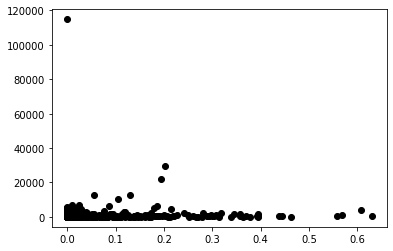

In [150]:
import matplotlib.pyplot as plt
plt.scatter(X, Y,  color='black')

In [127]:
#np.set_printoptions(suppress=True) #makes it not in scientific notation

In [111]:
#EX
x = np.array([2.0 , 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7])
y = np.array([196, 221, 136, 255, 244, 230, 232, 255, 267])

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

print(lr.predict([[2.4]]))

[198.36539227]
